## LIBRERÍAS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## IMPORTAMOS LOS DATOS

In [ ]:
#train_data = pd.read_csv("/content/drive/My Drive/TFM/data/code_train_df.csv",header=0, decimal=',')
#test_data = pd.read_csv("/content/drive/My Drive/TFM/data/code_test_df.csv",header=0, decimal=',')
train_data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/code_train_df.csv",header=0, decimal=',')
test_data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/code_test_df.csv",header=0, decimal=',')

In [ ]:
train_data.head(3)

,Unnamed: 0,COLOR,DIRECTOR,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,COUNTRY_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,WRITERS_0,CONTENT_RATING,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,CODE,DURATION,YEAR,RATING_CAT
0,0,1,2892,0,6,8,45,51,15272,14050,5798,4235,0,2759,1723,1723,2408,942379,106,2008,1
1,1,1,3354,8,8,8,38,162,1223,6883,15957,2411,0,4829,600,600,4763,36596,151,1944,2
2,2,1,2892,8,8,8,38,68,1033,15775,10888,2411,0,7815,3859,3859,2408,8539818,123,2019,2


In [ ]:
FEATURES = ['YEAR','DURATION','COLOR','DIRECTOR','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','COUNTRY_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2']
x_train = train_data[FEATURES]
y_train = train_data.RATING_CAT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
clf = GaussianNB()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4047582024568496


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.63      0.38      4746
           1       0.48      0.47      0.47     11286
           2       0.58      0.22      0.32      9692

    accuracy                           0.40     25724
   macro avg       0.44      0.44      0.39     25724
weighted avg       0.48      0.40      0.40     25724



## MATRIZ DE CONFUSIÓN

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1081 2438 1322]
 [1041 5530 4663]
 [ 458 4069 5122]]
Normalized confusion matrix
[[0.22330097 0.50361496 0.27308407]
 [0.09266512 0.49225565 0.41507922]
 [0.04746606 0.42170173 0.53083221]]


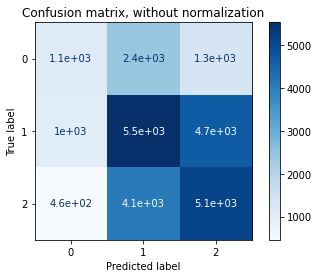

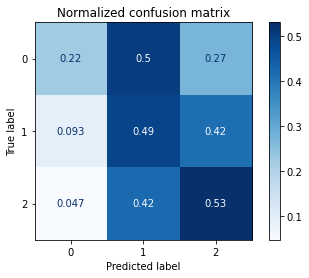

In [ ]:
print(__doc__)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['0','1','2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()